In [4]:
# %pip install networkx
# %pip install matplotlib
# %pip install scipy

In [2]:
import sys
import numpy as np
import gzip
import pickle
import networkx as nx
import matplotlib
import scipy



First we test the binary graph

In [3]:
G = load('./graph_mf_grc_binary_210519.gz')

In [4]:
G.nodes['mf_181__1']

{'mf_id': 'mf_181', 'xyz': (353353, 403741, 6703), 'cell_type': 'mf'}

In [5]:
G.nodes['grc_1651']

{'xyz': (344532, 408012, 5640), 'cell_type': 'grc'}

In [6]:
list(G.successors('mf_181__1'))

['grc_1651',
 'grc_330',
 'grc_1653',
 'grc_335',
 'grc_234',
 'grc_2100',
 'grc_303',
 'grc_1855',
 'grc_233',
 'grc_324',
 'grc_1792',
 'grc_2214',
 'grc_350',
 'grc_1641',
 'grc_1851',
 'grc_341',
 'grc_1682']

Now we test the synapse graph. Each synapse is represented as an edge

In [7]:
G_all = load('./graph_mf_grc_synapse_210518_all.gz')

In [8]:
print(G_all.nodes['mf_181'])
print(G_all.nodes['grc_1651'])

{'cell_type': 'mf', 'tags': ['no_soma']}
{'cell_type': 'grc', 'xyz': (1378128, 1632048, 5640), 'tags': []}


Since we have not extracted individual mf boutons here, there are no xyz positions for mf_181

In [9]:
# print all grcs synapsed by mf_181
list(G_all.successors('mf_181'))

['grc_1651',
 'grc_1761',
 'grc_2096',
 'grc_1127',
 'grc_1298',
 'grc_330',
 'grc_1653',
 'grc_335',
 'grc_1276',
 'grc_2228',
 'grc_191',
 'grc_958',
 'grc_708',
 'grc_967',
 'grc_890',
 'grc_719',
 'grc_1175',
 'grc_234',
 'grc_1094',
 'grc_2231',
 'grc_2372',
 'grc_1279',
 'grc_1264',
 'grc_1087',
 'grc_784',
 'grc_213',
 'grc_779',
 'grc_1263',
 'grc_2328',
 'grc_2296',
 'grc_1272',
 'grc_1282',
 'grc_1290',
 'grc_2107',
 'grc_2101',
 'grc_1170',
 'grc_1129',
 'grc_118',
 'grc_1140',
 'grc_1060',
 'grc_1010',
 'grc_2535',
 'grc_2100',
 'grc_303',
 'grc_1855',
 'grc_604',
 'grc_1133',
 'grc_772',
 'grc_1893',
 'grc_2159',
 'grc_930',
 'grc_943',
 'grc_233',
 'grc_1077',
 'grc_777',
 'grc_1049',
 'grc_324',
 'grc_1167',
 'grc_1200',
 'grc_1792',
 'grc_1293',
 'grc_2214',
 'grc_350',
 'grc_1641',
 'grc_1851',
 'grc_858',
 'grc_1178',
 'grc_781',
 'grc_2176',
 'grc_1090',
 'grc_1051',
 'grc_673',
 'grc_341',
 'grc_1682']

Inspect synapse data for a random MF-GrC pair

In [10]:
mf_id = 'mf_181'
grc_id = 'grc_943'
print(f"Number of synapses between {mf_id} and {grc_id}: {len(G_all.adj[mf_id][grc_id])}")
# print an example
print(G_all.adj[mf_id][grc_id][0])

Number of synapses between mf_181 and grc_943: 11
{'syn_loc': (112580, 116264, 528), 'syn_loc0': (450320, 465056, 21120), 'sf_pre': 13434258063672, 'sf_post': 13192356825852, 'pre_loc': (450384, 464912, 21120), 'post_loc': (450256, 465200, 21120), 'score': 489, 'props': {'area_erode0_no_realignment': {'mesh_area': 0.06242150307007857, 'mesh_diameter': 0.28191758751562734, 'ellipsoid_area': 0.066047320202812, 'ellipsoid_diameter': 0.2951959581375122, 'ellipsoid_area_drift': 0.06868452727413105, 'ellipsoid_diameter_drift': 0.29998744471995814}, 'area_erode0': {'pixel_count': 158, 'pixel_area': 0.05056, 'pixel_diameter': 0.2537222721437947, 'skeleton_area': 0.05871172243118286, 'skeleton_diameter': 0.27341193598469055, 'skeleton_longest_diameter': 350, 'mesh_area': 0.06084284732606434, 'mesh_diameter': 0.27832987484247745, 'ellipsoid_area': 0.066047320202812, 'ellipsoid_diameter': 0.2951959581375122, 'ellipsoid_area_drift': 0.0669332808880198, 'ellipsoid_diameter_drift': 0.296805641647736

Note that these synapse area measurements are not validated yet (work-in-progress). We recommend that you use the binary connectivity graph for your research.

Now we test the coalesced synapse graph.

In [11]:
G_coalesced = load('./graph_mf_grc_synapse_210518_coalesced.gz')

In [12]:
print(f"Number of synapses between {mf_id} and {grc_id}: {len(G_coalesced.adj[mf_id][grc_id])}")

Number of synapses between mf_181 and grc_943: 10


Note that one pair of synapses has been merged.

In [13]:
# This code checks for the difference in # of synapses between the two graphs
for grc_id in list(G_all.successors('mf_181')):
    if len(G_all.adj['mf_181'][grc_id]) != len(G_coalesced.adj['mf_181'][grc_id]):
        print(grc_id)

grc_943


KeyboardInterrupt: 

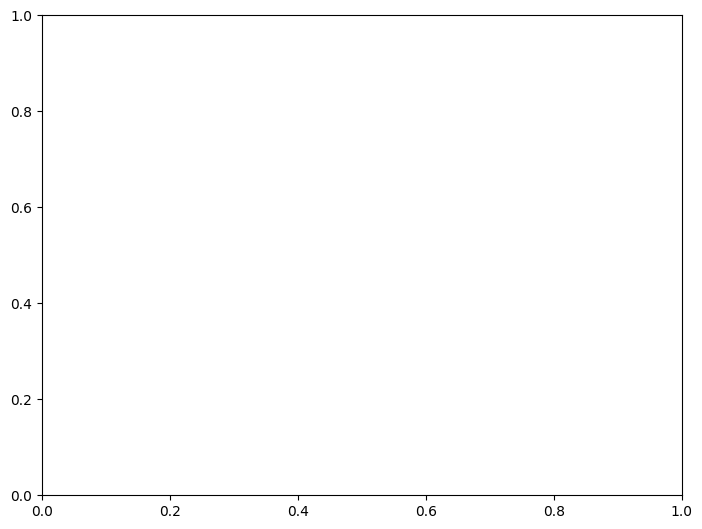

In [15]:
nx.draw(G_coalesced)


In [16]:
len(G_coalesced.nodes)

4700